**Voting Classifiers**
* There are two types of voting classifiers: Hard Voting Classifer and soft voting classifier.
* Generally soft voting classifier has greater accuracy than hard voting classifier.
* However, soft voting classifier requires that the individual classifiers can provide probability estimates, which is not always possible for all types of classifiers.

I.**Hard voting classifer**
* A hard voting classifier is a type of voting classifier where the final prediction is made based on a simple majority vote of the individual classifiers.
* For example, if there are three classifiers in the ensemble, and two of them predict class A while one predicts class B, the hard voting classifier would predict class A.

II.**Soft voting classifier**
*  A soft voting classifier is a type of voting classifier where the final prediction is made based on the average of the predicted probabilities of the individual classifiers.
* Let's say we have an ensemble of three individual classifiers, each of which predicts whether a patient has diabetes or not based on certain medical features such as blood pressure, age, and body mass index (BMI). The predicted probabilities for each patient are:

     * Classifier 1 predicts a probability of 0.7 for the patient having diabetes.
     * Classifier 2 predicts a probability of 0.6 for the patient having diabetes.
     * Classifier 3 predicts a probability of 0.8 for the patient having diabetes.

* To combine the predictions of these three classifiers using a soft voting classifier, we would take the average of the predicted probabilities for each class (diabetes or no diabetes) and select the class with the highest average probability.
      
     * Diabetes: (0.7 + 0.6 + 0.8) / 3 = 0.7
     * No diabetes: (0.3 + 0.4 + 0.2) / 3 = 0.3
* Since the average probability for diabetes is higher than the average probability for no diabetes, we would predict that the patient has diabetes.

**Diverse Classifiers For Ensemble**
* Ensemble methods work best when the predictors are as independ‐ent from one another as possible.
*  One way to get diverse classifiers is to train them using very different algorithms.
* Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.1, random_state=42)

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=80)
print(X_train.shape)
print(X_test.shape)

(8000, 2)
(2000, 2)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard'
 )
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))])

In [4]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.883
RandomForestClassifier 0.999
SVC 0.9995
VotingClassifier 0.999


In [5]:
# voting classifier with soft voting.
voting_clf2 = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='soft'
 )

voting_clf2.fit(X_train, y_train)
y_pred2=voting_clf2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9995

### Bagging and Boosting Key Differences

1. Bias/Variance
    * Bagging focuses on reducing variance.Bagging model generally results in low bias and high variance.
    * Boosting focuses on reducing bias.
2. Parallelisation
    * Training and prediction in bagging can be parallelised.Hence it is a highly scalable model.
    * Boosting is a sequential model.

### Bagging and Pasting


* To get diveerse set of classifiers,one approach is to  is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.
* There are 2 ways to accomplish above task:
1. **Bagging**
    * Sampling is performed **with replacement**.
    * Bagging (Bootstrap Aggregating) is a technique that involves sampling the training data with replacement to create  multiple subsets, called bootstrap samples. These samples are used to train multiple models, which are then combined using an averaging or voting method to make predictions. The bootstrap samples are typically of the same size as the original training set, which means that **some data points may be repeated in multiple samples**.
    
2. **Pasting**
    * Sampling is performed **without replacement**.
    * Pasting, on the other hand, is a similar technique to bagging but involves sampling the training data without replacement. This means that each **subset used to train a model is unique and does not contain any repeated data points**. Pasting can be useful when the training set is large and creating multiple subsets with replacement is not necessary to obtain diverse models.
    
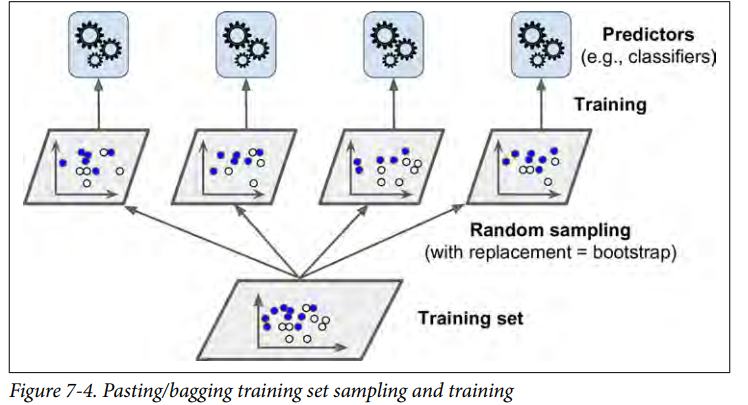

* Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors.
* The aggregation function is typically the statistical mode (i.e., the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression.
* The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class proba‐bilities (i.e., if it has a predict_proba() method), which is the case with Decision Trees classifiers.


**Bagging and Pasting in Scikit-Learn**
* The following code trains an ensemble of 500 Decision Tree classifiers.
* Each classifier is trained on 100 training instances randomly sampled from the training set with replacement(bagging).
* If you want to use pasting instead, just set 'bootstrap=False'.
* n_jobs param‐eter: tells Scikit-Learn the number of CPU cores to use for training and predictions(–1 tells Scikit-Learn to use all available cores).


In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1
 )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

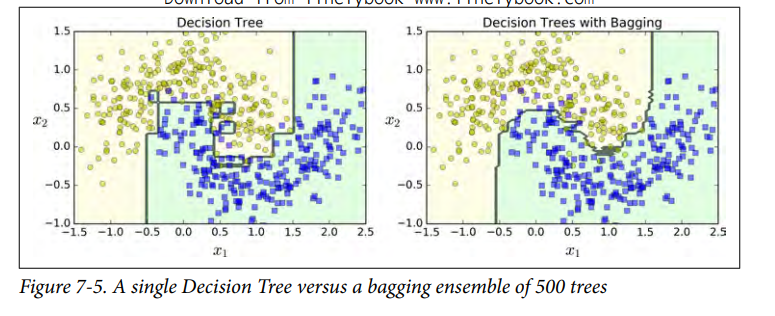

* As we can see in terms of bias there are almost comparable results but bagging model generalises better.

### Out-of-Bag Evaluation

* With bagging, some instances may be sampled several times for any given predictor,while others may not be sampled at all. 
* This means that only about 63% of the training instances are sampled on average for each predictor.The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances.
* Since a predictor never sees the oob instances during training, it can be evaluated onthese instances, without the need for a separate validation set or cross-validation.
* In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to request an automatic oob evaluation after training.And get oob_score_ variable.

In [7]:
 bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.99825

In [8]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.999

In [9]:
## oob_decision_function
bag_clf.oob_decision_function_


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

### Random Patches and Random Subspaces

* The BaggingClassifier class supports sampling the features as well. 
* Hyperparameters for feature sampling: max_features and bootstrap_features
* Hyperparameters for instance sampling: max_samples and bootstrap
* **Random Patches**:Sampling both training instances and features.
* **Random Subspaces**:Keeping all training instances(*set bootstrap=False and max_samples=1.0*) but sampling features(*set bootstrap_features=True and/or max_features smaller than 1.0*)

### Random Forests

In [10]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)


In [11]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
 )


### Extra-Trees(Extremely Randomised Trees)

* When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting (as discussed earlier).
* It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do).
* Extra Trees are fast as only few trees are needed as randomness is already introduced by randomising threshold.
* It is hard to tell in advance whether a RandomForestClassifier will perform better or worse than an ExtraTreesClassifier. Gen‐erally, the only way to know is to try both and compare them using cross-validation (and tuning the hyperparameters using grid search).

### Feature Importance
* It is easy to measure the relative importance of each feature,in particular if you need to perform feature selection by using  **feature_importances_variable**.

In [12]:
 from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.101211883239038
sepal width (cm) 0.02584156027720694
petal length (cm) 0.43454474245767233
petal width (cm) 0.43840181402608275


## Boosting
* Boosting is an ensemble technique that attempts to create a strong classifier from a number of weak classifiers.

### 1. Adaboost

*the forest of trees made by Adaboost usually has just a node and two leaves. (A tree with one node and two leaves is called a stump)*

* In Adaboost we will first put a sample weight to our data and find out the Gini index for all the independent variables, then our first stump is found using the Gini index which is lower than all the other independent variables.(We will find out the Gini index of all the independent variables in order to find out the first stump, lower the Gini index that indipendent variable will be first choosen.)
* Then we will find the total error and amount of say for that stump.
* Then we will update the sample weight values for all the incorrectly classified samples and also for the correctly classified samples.
* Then we will continue this for all the other stump.

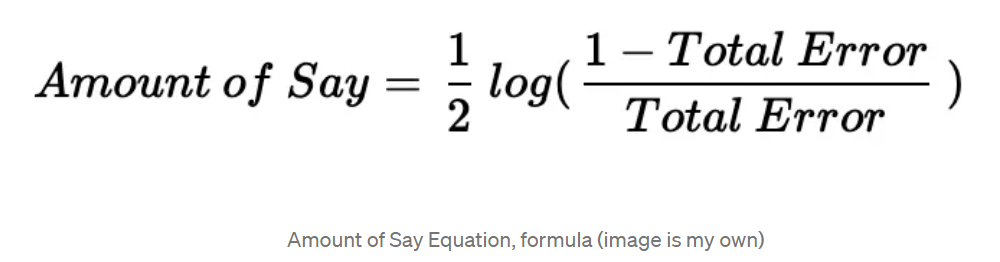

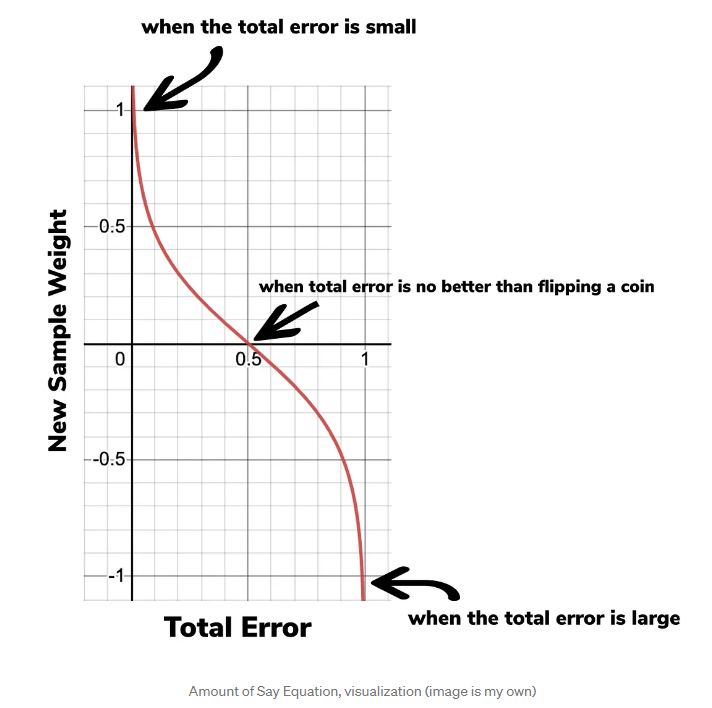

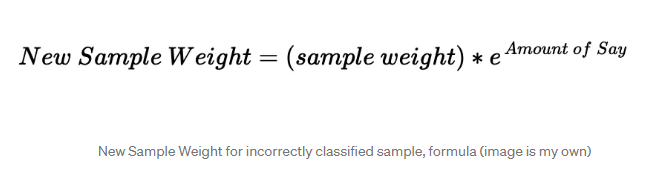

* New sample weight for misclassified sample

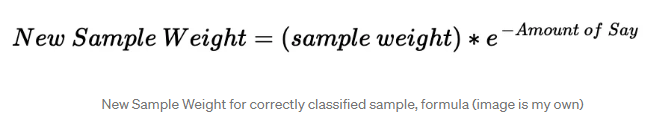

* New sample weight for correctly classified sample

In [14]:
# sklearn implementation of Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5
 )
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### 2.a Gradient Boosting

* Just like AdaBoost,Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor.
* However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.


In [23]:
# GradientBoosting Regressor implementation using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred


array([ 9.06861028e-01,  3.02149811e-01, -1.32320010e-04, ...,
        4.04609660e-01,  7.71056438e-02,  9.06861028e-01])

In [24]:
#A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRegressor class.

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

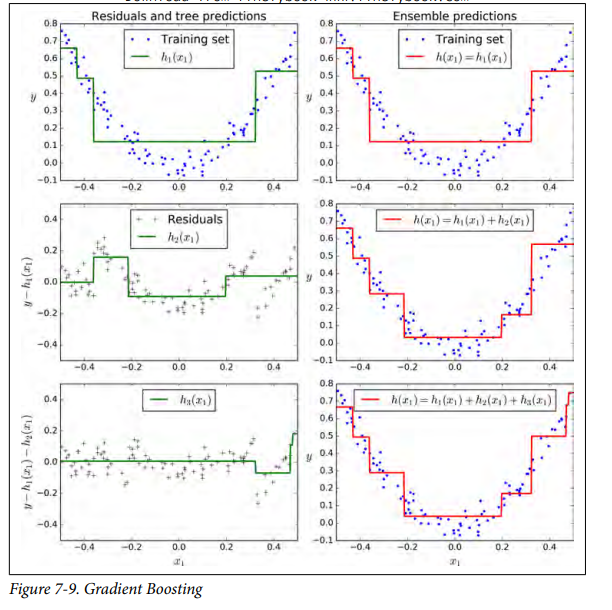

* Figure 7-9 represents the predictions of these three trees in the left column, and the ensemble’s predictions in the right column. 

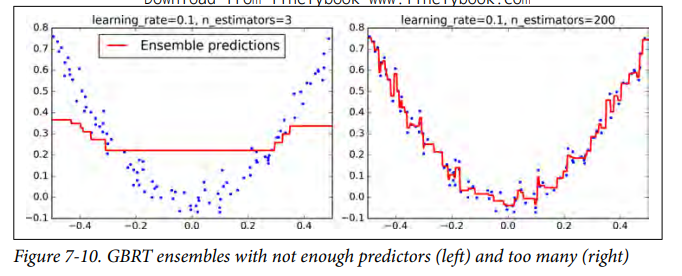

* The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the train‐ing set, but the predictions will usually generalize better. 
*  This is a regularization tech‐nique called shrinkage.
*  Figure 7-10 shows two GBRT ensembles trained with a low learning rate: the one on the left does not have enough trees to fit the training set,while the one on the right has too many trees and overfits the training set.

* In order to find the optimal number of trees use early stopping,following are two methods to imlement it:
    1.  staged_predict() method:: it returns an iterator over the predictions made by the ensemble at each stage of train‐
ing (with one tree, two trees, etc.).
    2.  warm_strat=True: by actually stopping training early(instead of training a large number of trees first and then looking back to find the optimal number).

In [25]:
# staged_predict()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
 for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=119)

In [26]:
# Early Stopping warm_start=True
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
    if error_going_up == 5:
        break # early stopping

### 2.b Extreme Gradient Boosting

In [28]:
! pip install xgboost

In [30]:
import xgboost

xgb_reg=xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
y_pred=xgb_reg.predict(X_val)

In [31]:
#XGBoost offers several nice features,such as automatically taking care of early stopping

xgb_reg.fit(X_train,y_train,eval_set=[(X_val,y_val)],early_stopping_rounds=2)
y_pred=xgb_reg.predict(X_val)


[0]	validation_0-rmse:0.35255
[1]	validation_0-rmse:0.25021
[2]	validation_0-rmse:0.17996
[3]	validation_0-rmse:0.13121
[4]	validation_0-rmse:0.09889
[5]	validation_0-rmse:0.07934
[6]	validation_0-rmse:0.06766
[7]	validation_0-rmse:0.05881
[8]	validation_0-rmse:0.05263
[9]	validation_0-rmse:0.05028
[10]	validation_0-rmse:0.04866
[11]	validation_0-rmse:0.04779
[12]	validation_0-rmse:0.04759
[13]	validation_0-rmse:0.04729
[14]	validation_0-rmse:0.04719
[15]	validation_0-rmse:0.04718
[16]	validation_0-rmse:0.04493
[17]	validation_0-rmse:0.04345
[18]	validation_0-rmse:0.04381
[19]	validation_0-rmse:0.04289
[20]	validation_0-rmse:0.04300
[21]	validation_0-rmse:0.04245
[22]	validation_0-rmse:0.04249


C:\Users\ShefaliGupta\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.04259


### 3. Catboost

In [13]:
#Adaboost
# https://medium.com/@ktv0303/adaptive-boosting-or-adaboost-algorithm-4e8b9b372556

# Stacking